In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import plotly.express as px

In [2]:
sns.set_theme(color_codes=True)
sns.set_style('whitegrid')
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_csv("USA_Housing.csv")

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [7]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


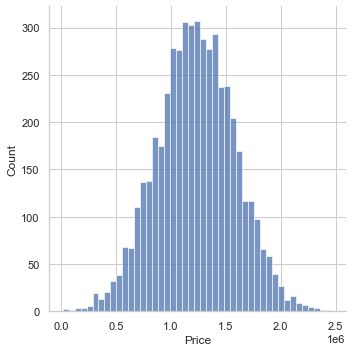

In [8]:
sns.displot(df['Price'])

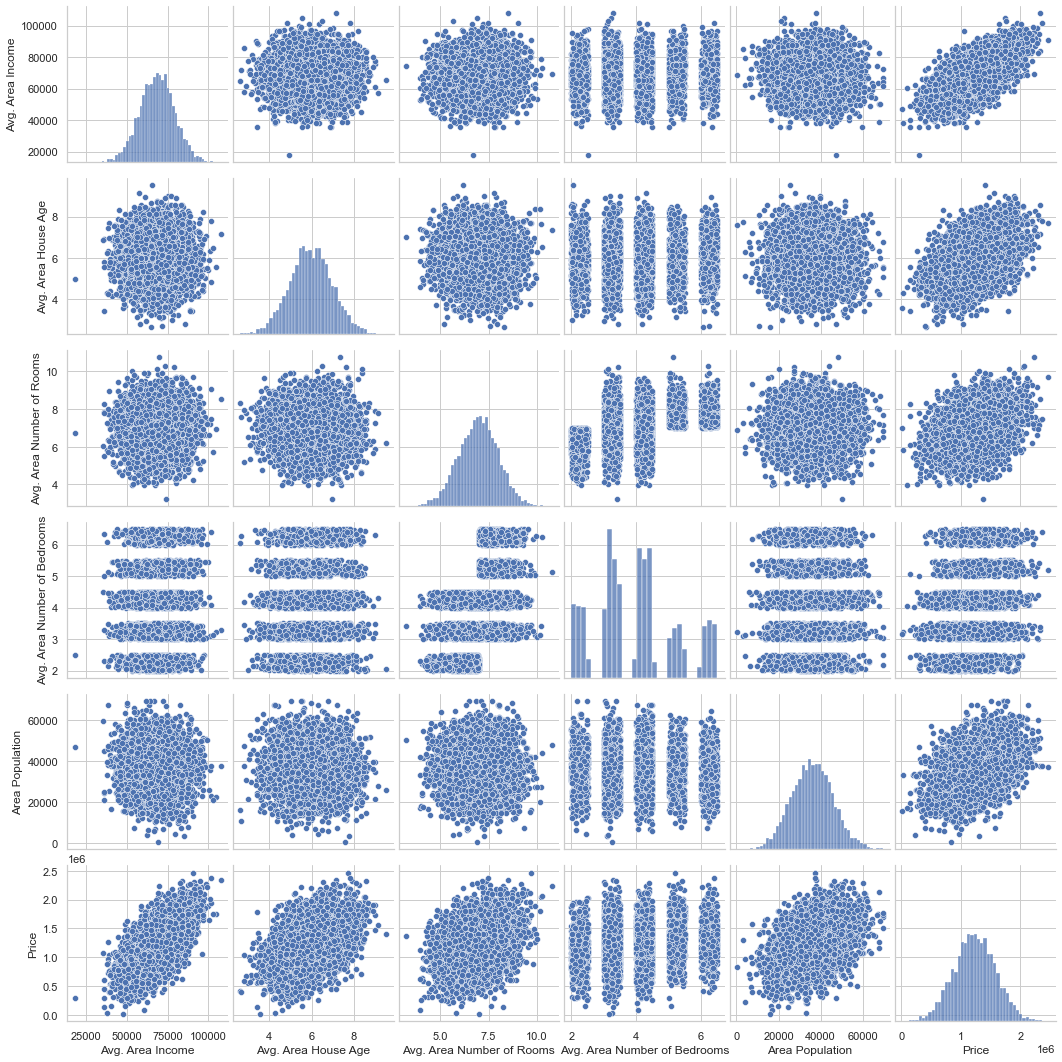

In [9]:
sns.pairplot(df)

<AxesSubplot:>

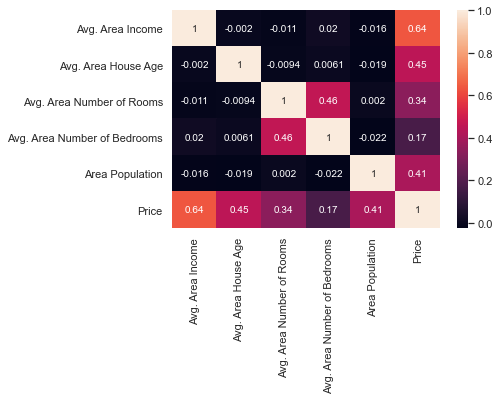

In [10]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

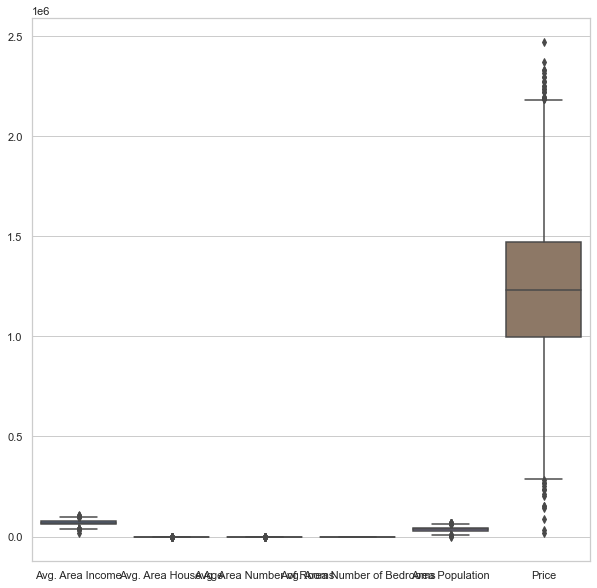

In [11]:
fig_dims = (10,10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(ax=ax, data=df)

In [12]:
df.corr()['Price'].sort_values() 

Avg. Area Number of Bedrooms    0.171071
Avg. Area Number of Rooms       0.335664
Area Population                 0.408556
Avg. Area House Age             0.452543
Avg. Area Income                0.639734
Price                           1.000000
Name: Price, dtype: float64

<AxesSubplot:xlabel='Avg. Area Income', ylabel='Price'>

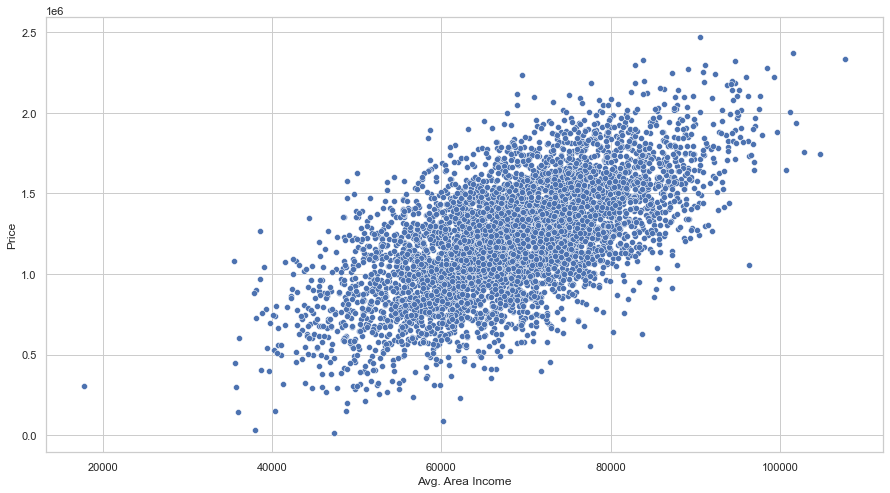

In [13]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Avg. Area Income',y='Price',data=df)

In [14]:
px.scatter(df,x='Avg. Area Income',y='Price')

<AxesSubplot:xlabel='Avg. Area Number of Rooms', ylabel='Price'>

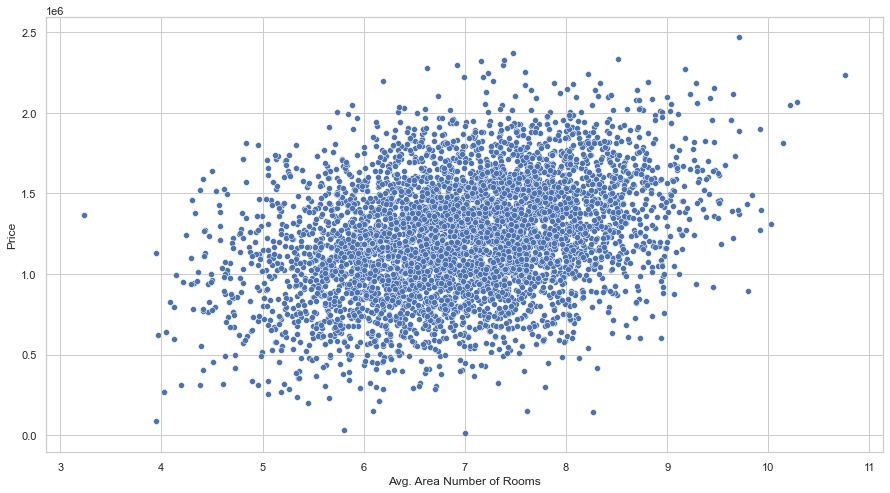

In [15]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Avg. Area Number of Rooms',y='Price',data=df)

In [16]:
px.scatter(df,x='Avg. Area Number of Rooms',y='Price')

In [17]:
#the correlation is low between price and Avg. Area Number of Rooms,
#So, don't need to check with them for outliers

In [18]:
df[(df['Avg. Area Income']<20000) & (df['Price']<400000)]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
39,17796.63119,4.949557,6.713905,2.5,47162.183643,302355.835979,"9932 Eric Circles\nLake Martha, WY 34611-6127"


In [19]:
drop_i = df[(df['Avg. Area Income']<20000) & (df['Price']<400000)]

In [20]:
drop_i

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
39,17796.63119,4.949557,6.713905,2.5,47162.183643,302355.835979,"9932 Eric Circles\nLake Martha, WY 34611-6127"


In [21]:
df = df.drop(index=39,axis=0)

In [22]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [23]:
px.scatter(df,x='Avg. Area Income',y='Price')

In [24]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [25]:
y = df['Price']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lm = LinearRegression()

In [30]:
lm.fit(X_train,y_train)

LinearRegression()

In [31]:
print(lm.intercept_)

-2649379.8988747094


In [32]:
lm.coef_

array([2.17154554e+01, 1.65337316e+05, 1.22606081e+05, 1.01411836e+03,
       1.50273908e+01])

In [33]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['coeff'])

In [34]:
cdf

,coeff
Avg. Area Income,21.715455
Avg. Area House Age,165337.316331
Avg. Area Number of Rooms,122606.080636
Avg. Area Number of Bedrooms,1014.118364
Area Population,15.027391


## Predictions

In [35]:
predictions = lm.predict(X_test)

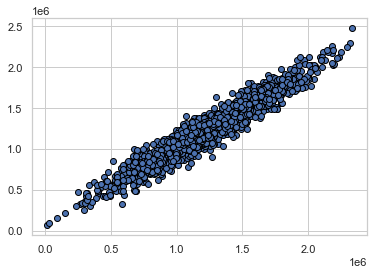

In [36]:
plt.scatter(y_test,predictions,edgecolors='Black')

In [38]:
df2 = pd.DataFrame({"y_test": y_test , "predictions": predictions})

In [39]:
df2.head()

,y_test,predictions
1719,1.882807e+06,1.821925e+06
2512,8.460557e+05,9.130558e+05
346,1.414287e+06,1.509375e+06
2522,1.302029e+06,1.351236e+06
55,1.159597e+06,1.126120e+06


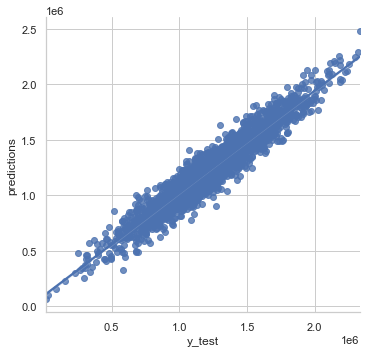

In [40]:
sns.lmplot(x='y_test',y='predictions',data=df2)

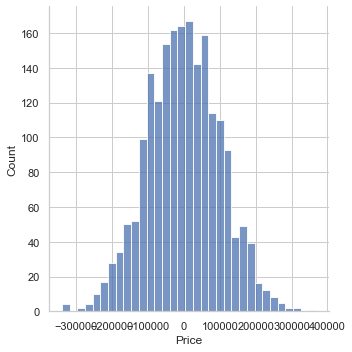

In [41]:
sns.displot((y_test-predictions))

### EVALUATING PERFORMANCE BY USING REGRESSION METRICS

In [42]:
from sklearn import metrics

In [43]:
metrics.mean_absolute_error(y_test,predictions)

80917.17485896348

In [44]:
metrics.mean_squared_error(y_test,predictions)

10231555727.83346

In [45]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

101151.15287446535